In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
print("Xtrainshape:", Xtrain.shape)
print("ytrainshape:", ytrain.shape)
print("Xtestshape:", Xtest.shape)
print("ytestshape:", ytest.shape)
print("Number of possible outputs" , len(np.unique(ytrain)))

('Xtrainshape:', (60000, 28, 28))
('ytrainshape:', (60000,))
('Xtestshape:', (10000, 28, 28))
('ytestshape:', (10000,))
('Number of possible outputs', 10)


In [3]:
k = np.random.randint(0,len(Xtrain),3)
for i in np.arange(len(k)):
    plt.figure(figsize=[2,2])
    sns.heatmap(Xtrain[i])

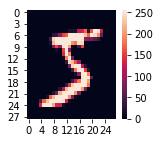

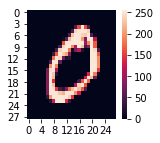

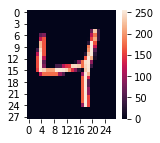

In [4]:
plt.show()

In [5]:
#Normalizing the data in the image and flattening the image,
trainsamples,height,width = Xtrain[0:12000,:,:].shape
testsamples,height,width = Xtest[0:2000,:,:].shape
Xtrain_flat = Xtrain[0:12000,:,:].reshape(trainsamples,height * width)
Xtest_flat = Xtest[0:2000,:,:].reshape(testsamples,height * width)
Xtrain_flat = Xtrain_flat/255.0
Xtest_flat = Xtest_flat/255.0
#one hot encoding - format requried by Keras for multiclass classification,
ytrain_oh = to_categorical(ytrain[0:12000])
ytest_oh = to_categorical(ytest[0:2000])

In [6]:
print("Xtrainshape:", Xtrain_flat.shape)
print("ytrainshape:", ytrain_oh.shape)
print("Xtestshape:", Xtest_flat.shape)
print("ytestshape:", ytest_oh.shape)
print("Number of possible outputs", len(np.unique(ytrain)))

('Xtrainshape:', (12000, 784))
('ytrainshape:', (12000, 10))
('Xtestshape:', (2000, 784))
('ytestshape:', (2000, 10))
('Number of possible outputs', 10)


In [7]:
model = Sequential()
model.add(Dense(512,activation ='relu', input_shape=(height*width,)))
model.add(Dense(512,activation= 'relu'))
model.add(Dense(len(np.unique(ytrain)),activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(Xtrain_flat,ytrain_oh,batch_size=256, epochs=30,verbose=1,validation_data=(Xtest_flat,ytest_oh))

Train on 12000 samples, validate on 2000 samples
Epoch 1/30
12000/12000 [==============================] - 0s - loss: 0.5913 - acc: 0.8152 - val_loss: 0.4181 - val_acc: 0.8615
Epoch 2/30
12000/12000 [==============================] - 0s - loss: 0.2376 - acc: 0.9279 - val_loss: 0.2549 - val_acc: 0.9175
Epoch 3/30
12000/12000 [==============================] - 0s - loss: 0.1596 - acc: 0.9508 - val_loss: 0.2308 - val_acc: 0.9305
Epoch 4/30
12000/12000 [==============================] - 0s - loss: 0.1065 - acc: 0.9686 - val_loss: 0.1793 - val_acc: 0.9435
Epoch 5/30
12000/12000 [==============================] - 0s - loss: 0.0793 - acc: 0.9749 - val_loss: 0.2035 - val_acc: 0.9350
Epoch 6/30
12000/12000 [==============================] - 0s - loss: 0.0497 - acc: 0.9842 - val_loss: 0.1706 - val_acc: 0.9465
Epoch 7/30
12000/12000 [==============================] - 0s - loss: 0.0406 - acc: 0.9874 - val_loss: 0.1569 - val_acc: 0.9505
Epoch 8/30
12000/12000 [==============================] - 0s -

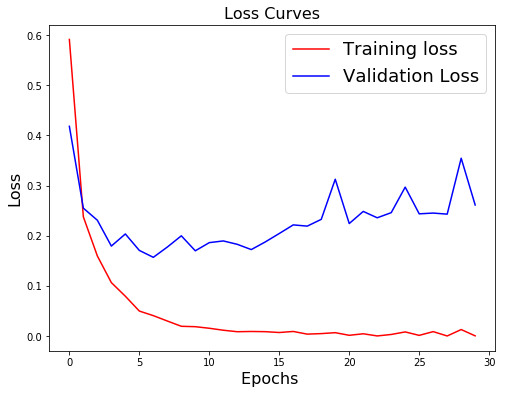

In [9]:
#plot loss and accuracy curves
plt.figure(figsize = [8,6])
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

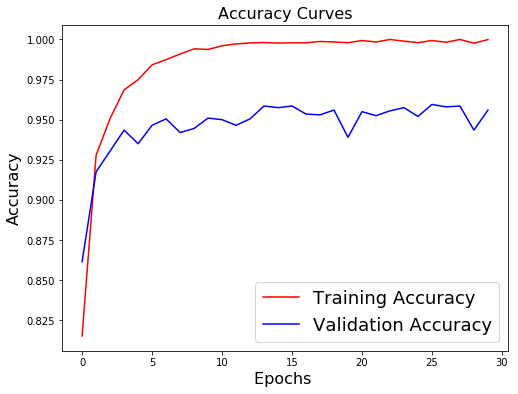

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [11]:
from keras.layers import Dropout
model_reg = Sequential()
model_reg.add(Dense(512,activation ='relu', input_shape=(height*width,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512,activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(len(np.unique(ytrain)),activation='softmax'))

In [12]:
model_reg.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history_reg = model_reg.fit(Xtrain_flat,ytrain_oh,batch_size=256, epochs=30,verbose=1,validation_data=(Xtest_flat,ytest_oh))

Train on 12000 samples, validate on 2000 samples
Epoch 1/30
12000/12000 [==============================] - 0s - loss: 0.7373 - acc: 0.7672 - val_loss: 0.3936 - val_acc: 0.8795
Epoch 2/30
12000/12000 [==============================] - 0s - loss: 0.3327 - acc: 0.8987 - val_loss: 0.2995 - val_acc: 0.9020
Epoch 3/30
12000/12000 [==============================] - 0s - loss: 0.2452 - acc: 0.9250 - val_loss: 0.2793 - val_acc: 0.9105
Epoch 4/30
12000/12000 [==============================] - 0s - loss: 0.1996 - acc: 0.9399 - val_loss: 0.2404 - val_acc: 0.9265
Epoch 5/30
12000/12000 [==============================] - 0s - loss: 0.1631 - acc: 0.9496 - val_loss: 0.1996 - val_acc: 0.9365
Epoch 6/30
12000/12000 [==============================] - 0s - loss: 0.1401 - acc: 0.9571 - val_loss: 0.2017 - val_acc: 0.9395
Epoch 7/30
12000/12000 [==============================] - 0s - loss: 0.1200 - acc: 0.9616 - val_loss: 0.1942 - val_acc: 0.9405
Epoch 8/30
12000/12000 [==============================] - 0s -

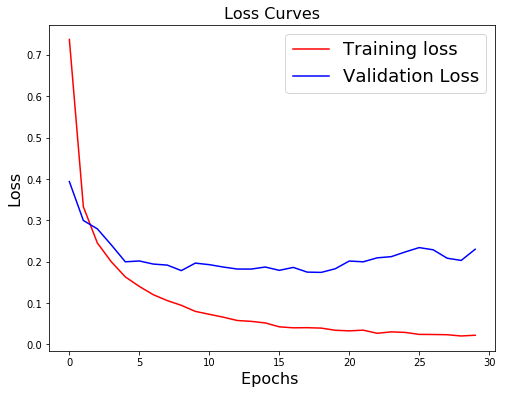

In [13]:
#plot loss and accuracy curves
plt.figure(figsize = [8,6])
plt.plot(history_reg.history['loss'],'r')
plt.plot(history_reg.history['val_loss'],'b')
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

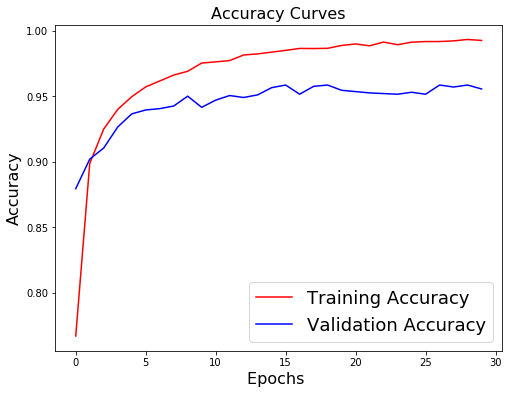

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r')
plt.plot(history_reg.history['val_acc'],'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()